In [102]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.4.0+cu121
0.19.0+cu121


In [103]:
train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

Files already downloaded and verified
Files already downloaded and verified


In [104]:
len(train_data), len(test_data)

(50000, 10000)

In [105]:
class_names =train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [106]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [107]:
train_data.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [108]:
image,label=train_data[0]
image,label

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [109]:
image.shape,label

(torch.Size([3, 32, 32]), 6)

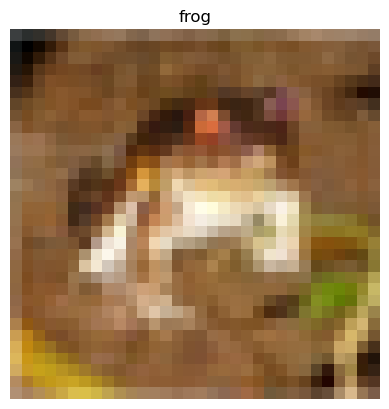

In [110]:
image,label=train_data[0]
image = image.permute(1, 2, 0)
plt.imshow(image.squeeze(),cmap='viridis')
plt.title(class_names[label])
plt.axis("off")
plt.show()

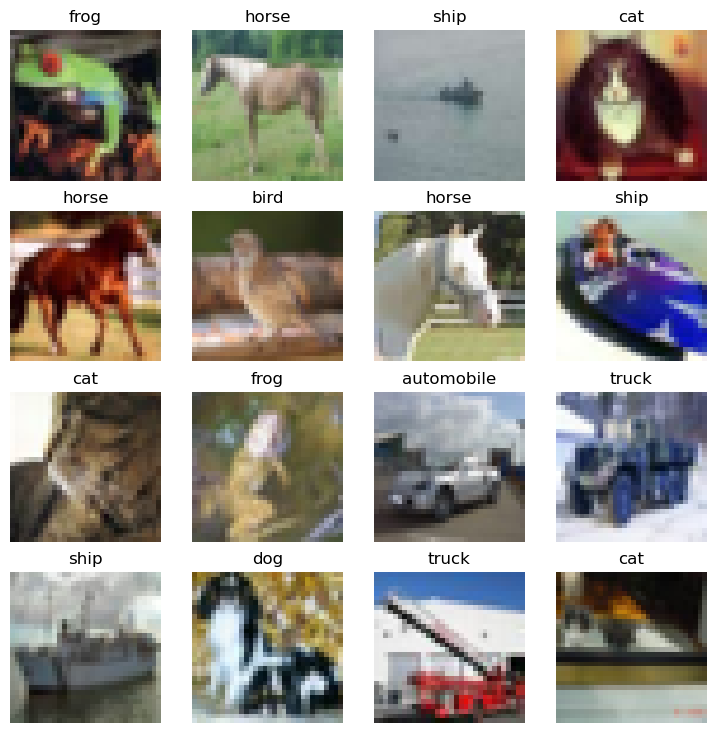

In [111]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    img=img.permute(1,2,0)
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis("off")
plt.show()


In [112]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader=DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x757a711c6da0>,
 <torch.utils.data.dataloader.DataLoader at 0x757a711c7a90>)

In [113]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

In [114]:
flatten_model=nn.Flatten()
flatten_model

Flatten(start_dim=1, end_dim=-1)

In [115]:
x=train_features_batch[0]
print(f"Shape before flattening:{x.shape}")
x=flatten_model(x)
print(f"Shape after flattening:{x.shape}")

Shape before flattening:torch.Size([3, 32, 32])
Shape after flattening:torch.Size([3, 1024])


In [116]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper functions already downloaded")
else:
  print("Downloading helper functions")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper functions already downloaded


In [117]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [184]:
class CIFAR_10_Model(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Dropout(0.25)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units*2,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(hidden_units*2),
        nn.Conv2d(in_channels=hidden_units*2,out_channels=hidden_units*2,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(hidden_units*2),
        nn.MaxPool2d(kernel_size=2),
        nn.Dropout(0.25)
    )
    self.conv_block_3=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units*2,out_channels=hidden_units*4,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(hidden_units*4),
        nn.Conv2d(in_channels=hidden_units*4,out_channels=hidden_units*4,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(hidden_units*4),
        nn.MaxPool2d(kernel_size=2),
        nn.Dropout(0.25)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*8*8,out_features=output_shape)
    )
  def forward(self,x:torch.Tensor):
    x=self.conv_block_1(x)
    x=self.conv_block_2(x)
    x=self.conv_block_3(x)
    x=self.classifier(x)
    return x


In [185]:
torch.cuda.is_available()

True

In [186]:
from tqdm.auto import tqdm

In [187]:
import torch
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [188]:
torch.manual_seed(42)
model =CIFAR_10_Model(input_shape=3,hidden_units=32,output_shape=len(class_names)).to(device)
model

CIFAR_10_Model(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

In [189]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [190]:
def train_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer,accuracy_fn,device:torch.device=device):
  train_loss,train_acc=0,0
  model.train()

  for batch,(X,y) in enumerate(train_dataloader):

    X,y=X.to(device),y.to(device)

    y_pred=model(X)

    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)

  print(f"Train loss:{train_loss:.4f} | Train acc:{train_acc:.2f}")

In [191]:
def test_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
  test_loss,test_acc=0,0
  model.eval()

  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y=X.to(device),y.to(device)

      test_pred=model(X)

      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test loss:{test_loss:.4f} | Test acc:{test_acc:.2f}%\n")

In [192]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2=timer()

epochs=11

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------")
  train_step(model=model,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device=device)
  test_step(model=model,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,end=train_time_end_model_2,device=device)

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch:0
-------
Train loss:1.8375 | Train acc:43.35


  9%|▉         | 1/11 [00:14<02:26, 14.68s/it]

Test loss:1.3230 | Test acc:51.86%

Epoch:1
-------
Train loss:1.0956 | Train acc:60.97


 18%|█▊        | 2/11 [00:28<02:05, 13.90s/it]

Test loss:1.1235 | Test acc:61.40%

Epoch:2
-------
Train loss:0.8858 | Train acc:68.67


 27%|██▋       | 3/11 [00:41<01:48, 13.54s/it]

Test loss:0.8472 | Test acc:70.11%

Epoch:3
-------
Train loss:0.7615 | Train acc:73.37


 36%|███▋      | 4/11 [00:54<01:34, 13.51s/it]

Test loss:0.9915 | Test acc:67.06%

Epoch:4
-------
Train loss:0.6809 | Train acc:76.21


 45%|████▌     | 5/11 [01:08<01:21, 13.62s/it]

Test loss:0.7677 | Test acc:72.56%

Epoch:5
-------
Train loss:0.6255 | Train acc:77.97


 55%|█████▍    | 6/11 [01:22<01:08, 13.79s/it]

Test loss:0.6676 | Test acc:76.99%

Epoch:6
-------
Train loss:0.5797 | Train acc:79.66


 64%|██████▎   | 7/11 [01:36<00:55, 13.93s/it]

Test loss:0.5920 | Test acc:79.77%

Epoch:7
-------
Train loss:0.5415 | Train acc:81.26


 73%|███████▎  | 8/11 [01:51<00:42, 14.26s/it]

Test loss:0.5804 | Test acc:80.45%

Epoch:8
-------
Train loss:0.5050 | Train acc:82.37


 82%|████████▏ | 9/11 [02:05<00:28, 14.15s/it]

Test loss:0.5752 | Test acc:80.43%

Epoch:9
-------
Train loss:0.4789 | Train acc:83.19


 91%|█████████ | 10/11 [02:21<00:14, 14.56s/it]

Test loss:0.5734 | Test acc:81.24%

Epoch:10
-------
Train loss:0.4555 | Train acc:84.02


100%|██████████| 11/11 [02:36<00:00, 14.21s/it]

Test loss:0.5608 | Test acc:80.98%

Train time on cuda: 156.348 seconds


In [193]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn,device=device):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y=X.to(device),y.to(device)
      y_pred=model(X)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name":model.__class__.__name__,"model_loss":loss.item(),"model_acc":acc}

In [194]:
model_results=eval_model(model=model,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)
model_results

100%|██████████| 313/313 [00:01<00:00, 168.49it/s]


{'model_name': 'CIFAR_10_Model',
 'model_loss': 0.5607964992523193,
 'model_acc': 80.98043130990415}

In [197]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([3, 32, 32])

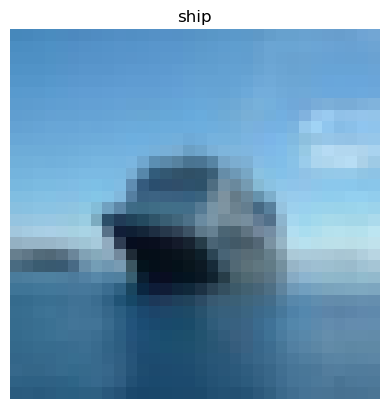

In [199]:
plt.imshow(test_samples[0].permute(1,2,0))
plt.title(class_names[test_labels[0]])
plt.axis("off")
plt.show()

In [200]:
def make_predictions(model:torch.nn.Module,data:list,device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0).to(device)

      pred_logit=model(sample)

      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [201]:
#Make predictions
pred_probs=make_predictions(model=model,data=test_samples)
pred_probs[:2]

tensor([[4.2134e-02, 3.7171e-04, 1.9969e-02, 1.6458e-04, 4.2896e-04, 1.4223e-04,
         9.8674e-03, 1.0006e-05, 9.2681e-01, 9.8607e-05],
        [1.9951e-03, 9.9602e-01, 1.0892e-07, 2.6956e-09, 2.4313e-10, 2.2740e-10,
         1.0127e-09, 1.3239e-08, 6.4691e-04, 1.3360e-03]])

In [202]:
# Convert prediction probabilities to labels
pred_classes=torch.argmax(pred_probs,dim=1)
pred_classes

tensor([8, 1, 9, 5, 7, 6, 1, 8, 6])

In [203]:
test_labels

[8, 1, 9, 5, 7, 6, 1, 3, 6]

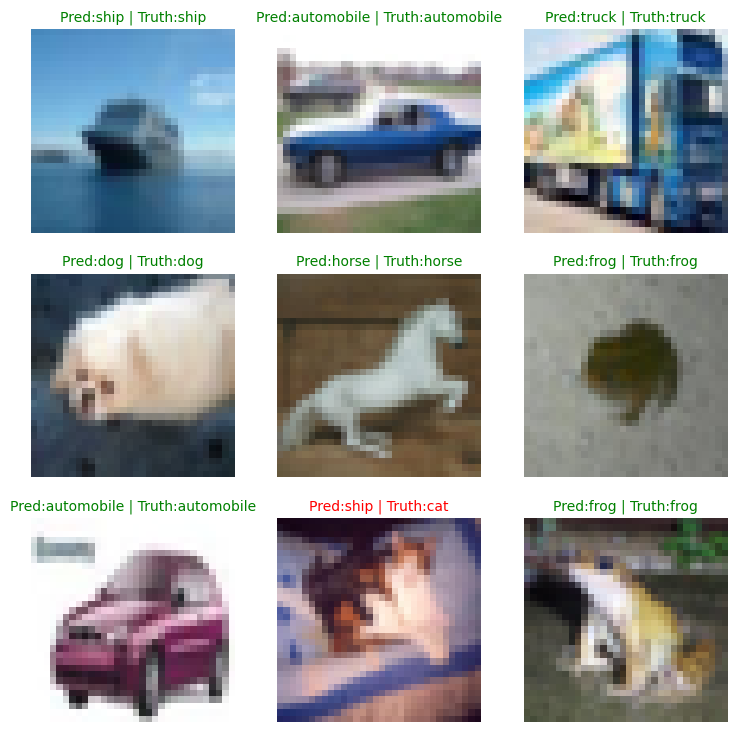

In [205]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)

  plt.imshow(sample.permute(1,2,0))

  pred_label=class_names[pred_classes[i]]

  truth_label=class_names[test_labels[i]]

  title_text=f"Pred:{pred_label} | Truth:{truth_label}"

  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,color="green")
  else:
    plt.title(title_text,fontsize=10,color="red")

  plt.axis("off")



In [216]:
from tqdm.auto import tqdm

y_preds=[]
model.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making predictions .."):
    X,y=X.to(device),y.to(device)
    y_logits=model(X)
    y_pred=torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())


#print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor

Making predictions ..: 100%|██████████| 313/313 [00:01<00:00, 161.05it/s]


tensor([3, 1, 0,  ..., 5, 1, 7])

In [217]:
len(y_pred_tensor)

10000

In [218]:
import mlxtend
import torchmetrics

In [219]:
mlxtend.__version__

'0.23.1'

In [220]:
torchmetrics.__version__

'1.4.1'

In [222]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(task="Multiclass",num_classes=len(class_names))
y_true_tensor = torch.tensor(test_data.targets)
confmat_tensor=confmat(preds=y_pred_tensor,target=y_true_tensor)
confmat_tensor

tensor([[736,   1, 129,  32,  23,  10,   5,  17,  45,   2],
        [139, 552,  20,  32,   8,   8,  17,  14,  95, 115],
        [ 53,   2, 688,  90,  57,  45,  37,  20,   5,   3],
        [ 20,   2,  88, 660,  42, 129,  31,  22,   6,   0],
        [ 12,   2, 113, 113, 629,  65,  36,  29,   0,   1],
        [  8,   1,  76, 252,  43, 575,   8,  32,   3,   2],
        [  7,   4, 120, 158,  40,  30, 628,   5,   8,   0],
        [ 21,   2,  92,  99, 145, 102,   7, 526,   3,   3],
        [172,  21,  68,  30,   7,   5,  15,   7, 663,  12],
        [153,  42,  25,  56,  17,  19,   9,  31,  34, 614]])

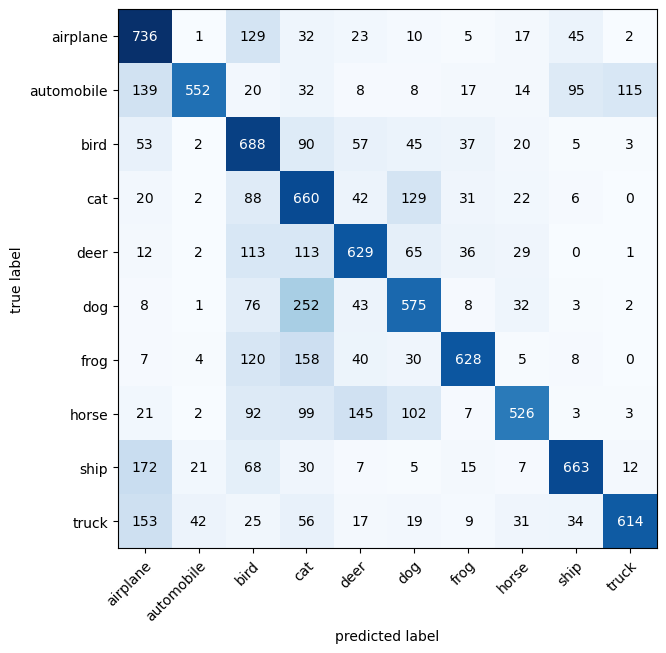

In [223]:
fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=class_names,figsize=(10,7))
plt.show()

In [224]:
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="CIFAR_10.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/CIFAR_10.pth')

In [225]:
torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH )

In [226]:
torch.manual_seed(42)
loaded_model=CIFAR_10_Model(input_shape=3,hidden_units=32,output_shape=len(class_names))
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.to(device)

/tmp/ipykernel_5567/3361720851.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


CIFAR_10_Model(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

In [227]:
torch.manual_seed(42)

loaded_model_results=eval_model(model=loaded_model,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)
loaded_model_results

100%|██████████| 313/313 [00:01<00:00, 163.68it/s]


{'model_name': 'CIFAR_10_Model',
 'model_loss': 0.5607964992523193,
 'model_acc': 80.98043130990415}

In [228]:
model_results

{'model_name': 'CIFAR_10_Model',
 'model_loss': 0.5607964992523193,
 'model_acc': 80.98043130990415}

In [230]:
torch.isclose(torch.tensor(model_results["model_loss"]),torch.tensor(loaded_model_results["model_loss"]),atol=1e-08)

tensor(True)